<a href="https://colab.research.google.com/github/ikanx101/Live-Session-Nutrifood-R/blob/master/Sekolah_UTBK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
rm(list=ls())

library(dplyr)
library(rvest)
library(ggplot2)

In [17]:
url = paste0("https://top-1000-sekolah.ltmpt.ac.id/?page=",1:3,"&per-page=100")

scrap = function(url){
  hasil = read_html(url) %>% html_table(fill = T)
  hasil = hasil[[2]]
  return(hasil)
}

data = data.frame()

for(i in 1:3){
  temp = scrap(url[i])
  data = rbind(temp,data)
}

In [18]:
colnames(data) = tolower(colnames(data))
data %>% str()

tibble [303 × 9] (S3: tbl_df/tbl/data.frame)
 $ #           : int [1:303] NA 201 202 203 204 205 206 207 208 209 ...
 $ npsn        : int [1:303] NA 69859366 10304887 10507942 20533635 10404019 10648016 10609704 10307523 20300617 ...
 $ sekolah     : chr [1:303] "" "SMKN JATENG DI SEMARANG More.." "SMA NEGERI AGAM CENDEKIA More.." "MAN INSAN CENDEKIA JAMBI More.." ...
 $ provinsi    : chr [1:303] "" "Jawa Tengah" "Sumatera Barat" "Jambi" ...
 $ rerata      : chr [1:303] "" "549,946" "549,634" "549,499" ...
 $ tertinggi   : chr [1:303] "" "603,933" "618,148" "639,245" ...
 $ terendah    : chr [1:303] "" "472,91" "462,85" "464,45" ...
 $ std. deviasi: chr [1:303] "" "33,67" "31,79" "42,94" ...
 $ jenis       : chr [1:303] "SMAMA SMKPKBM" "SMK" "SMA" "MA" ...


In [19]:
transform = function(var){
  var = gsub("\\,",".",var)
  var = as.numeric(var)
  return(var)
}

data = 
  data %>%
  mutate(rerata = transform(rerata),
         tertinggi = transform(tertinggi),
         terendah = transform(terendah)) %>%
  filter(!is.na(rerata)) %>%
  filter(!is.na(terendah)) %>%
  filter(!is.na(tertinggi)) %>%
  distinct()

data %>% str()

tibble [300 × 9] (S3: tbl_df/tbl/data.frame)
 $ #           : int [1:300] 201 202 203 204 205 206 207 208 209 210 ...
 $ npsn        : int [1:300] 69859366 10304887 10507942 20533635 10404019 10648016 10609704 10307523 20300617 20409906 ...
 $ sekolah     : chr [1:300] "SMKN JATENG DI SEMARANG More.." "SMA NEGERI AGAM CENDEKIA More.." "MAN INSAN CENDEKIA JAMBI More.." "SMAS KATOLIK ST ALBERTUS More.." ...
 $ provinsi    : chr [1:300] "Jawa Tengah" "Sumatera Barat" "Jambi" "Jawa Timur" ...
 $ rerata      : num [1:300] 550 550 549 549 549 ...
 $ tertinggi   : num [1:300] 604 618 639 647 641 ...
 $ terendah    : num [1:300] 473 463 464 448 439 ...
 $ std. deviasi: chr [1:300] "33,67" "31,79" "42,94" "37,92" ...
 $ jenis       : chr [1:300] "SMK" "SMA" "MA" "SMA" ...


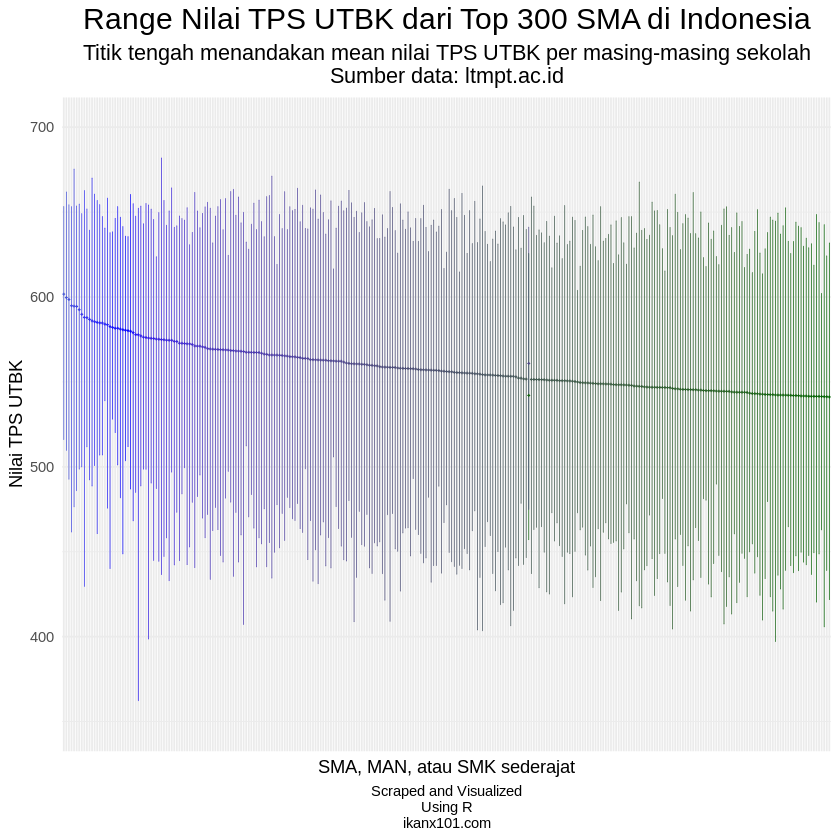

In [21]:
data %>%
  ggplot(aes(x = reorder(sekolah,-rerata),
             color = rerata)
        ) +
  geom_errorbar(aes(ymax = tertinggi,
                    ymin = terendah),
                size = .2,
                width = .2) +
  geom_point(aes(y = rerata),
             size = .05,
             shape = 3) +
  scale_color_gradient2(high = "steelblue",low = "darkgreen",mid = "blue",midpoint = 580) +
  ylim(350,700) +
  labs(title = "Range Nilai TPS UTBK dari Top 300 SMA di Indonesia",
       caption = "Scraped and Visualized\nUsing R\nikanx101.com",
       subtitle = "Titik tengah menandakan mean nilai TPS UTBK per masing-masing sekolah\nSumber data: ltmpt.ac.id",
       x = "SMA, MAN, atau SMK sederajat",
       y = "Nilai TPS UTBK") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = .5, size = 18),
        plot.subtitle = element_text(hjust = .5, size = 13),
        plot.caption = element_text(hjust = .5),
        legend.position = "none",
        axis.text.x = element_blank())
 
  ggsave("Sekolah.png", width = 10, height = 9, dpi = 450)